In [13]:
import pandas as pd
import os

# Define the folder path where your datasets are located
data_folder = r'C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset'

# Define the output path and filename for the merged dataset
output_file_path = os.path.join(data_folder, 'merged_dataset_with_year.csv')

# Define all expected column names, based on your latest list
# Ensure this list covers all columns you wish to retain
expected_columns = [
    'AUTHORISATION ID / PERMIT ID',
    'ACTIVITY DESCRIPTION',
    'OPERATOR NAME',
    'SITE ADDRESS',
    'SITE POSTCODE',
    'EASTING',
    'NORTHING',
    'EA AREA NAME',
    'ROUTE NAME',
    'SUBSTANCE NAME',
    'REPORTING THRESHOLD (kg)',
    'QUANTITY RELEASED (kg)',
    'REGULATED INDUSTRY SECTOR',
    'REGULATED INDUSTRY SUB SECTOR',
    'PNEC (??g/L)', # Note the special characters '??' in this column name
    'Latitude',
    'Longitude',
    'REGION',
    'COUNTY',
    'EA AREA NAME LABEL',
    'ROUTE NAME LABEL'
]

# Create an empty list to store each DataFrame
all_dfs = []

# Loop through years from 2016 to 2023
for year_suffix in range(16, 24):
    year = 2000 + year_suffix
    file_name = f'd{year_suffix}_v4.csv'
    file_path = os.path.join(data_folder, file_name)

    try:
        # Attempt to read the CSV file
        # If special characters in 'PNEC (??g/L)' cause encoding issues, you might need to specify encoding.
        # Example: df = pd.read_csv(file_path, encoding='latin1')
        df = pd.read_csv(file_path)

        # --- Core column name standardization steps ---
        # 1. Strip leading/trailing whitespace from column names
        df.columns = df.columns.str.strip()
        # 2. Convert column names to uppercase to ensure case consistency
        df.columns = df.columns.str.upper()

        # Standardize the expected column names as well for matching
        standardized_expected_columns = [col.strip().upper() for col in expected_columns]

        # Check for and add any missing columns to ensure consistent structure across all DataFrames
        for col in standardized_expected_columns:
            if col not in df.columns:
                df[col] = pd.NA # Or None, depending on your preferred empty value type

        # Reorder and select only the columns we care about, ensuring identical column order and names
        df = df[standardized_expected_columns]

        # Add the 'Year' column
        df['Year'] = year
        all_dfs.append(df)
        print(f"Successfully loaded and processed file: {file_name}")

    except FileNotFoundError:
        print(f"File not found: {file_name}. Please check if the file exists and the path is correct.")
    except Exception as e:
        print(f"An error occurred while loading file {file_name}: {e}")

# Concatenate all DataFrames into a single one
if all_dfs:
    merged_df = pd.concat(all_dfs, ignore_index=True)
    print("\nAll datasets have been successfully merged!")
    print(f"The merged dataset contains {len(merged_df)} rows and {len(merged_df.columns)} columns.")

    # Save the merged dataset to the specified path
    merged_df.to_csv(output_file_path, index=False)
    print(f"The merged dataset has been saved to: {output_file_path}")
else:
    print("\nNo datasets were loaded successfully. Please check your files.")

Successfully loaded and processed file: d16_v4.csv
Successfully loaded and processed file: d17_v4.csv
Successfully loaded and processed file: d18_v4.csv
Successfully loaded and processed file: d19_v4.csv
Successfully loaded and processed file: d20_v4.csv
Successfully loaded and processed file: d21_v4.csv
Successfully loaded and processed file: d22_v4.csv
Successfully loaded and processed file: d23_v4.csv

All datasets have been successfully merged!
The merged dataset contains 9678 rows and 22 columns.
The merged dataset has been saved to: C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the chart style
sns.set(style="whitegrid")

# Path
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"

# Read data
df = pd.read_csv(file_path)

# Standardized pollutant names
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()


In [26]:
# Define PNEC value dictionary (unit: µg/L)
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Add PNEC column
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)

# Recalculate Toxic Pressure
df['Toxic Pressure'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Check if it succeeded
print(df[['SUBSTANCE NAME', 'QUANTITY RELEASED (KG)', 'PNEC (µg/L)', 'Toxic Pressure']].head())


  SUBSTANCE NAME  QUANTITY RELEASED (KG)  PNEC (mg/L)  Toxic Pressure
0   Fluoranthene                    0.13     0.000762      170.603675
1   Fluoranthene                    0.22     0.000762      288.713911
2   Fluoranthene                    0.29     0.000762      380.577428
3   Fluoranthene                    0.52     0.000762      682.414698
4   Fluoranthene                    0.53     0.000762      695.538058


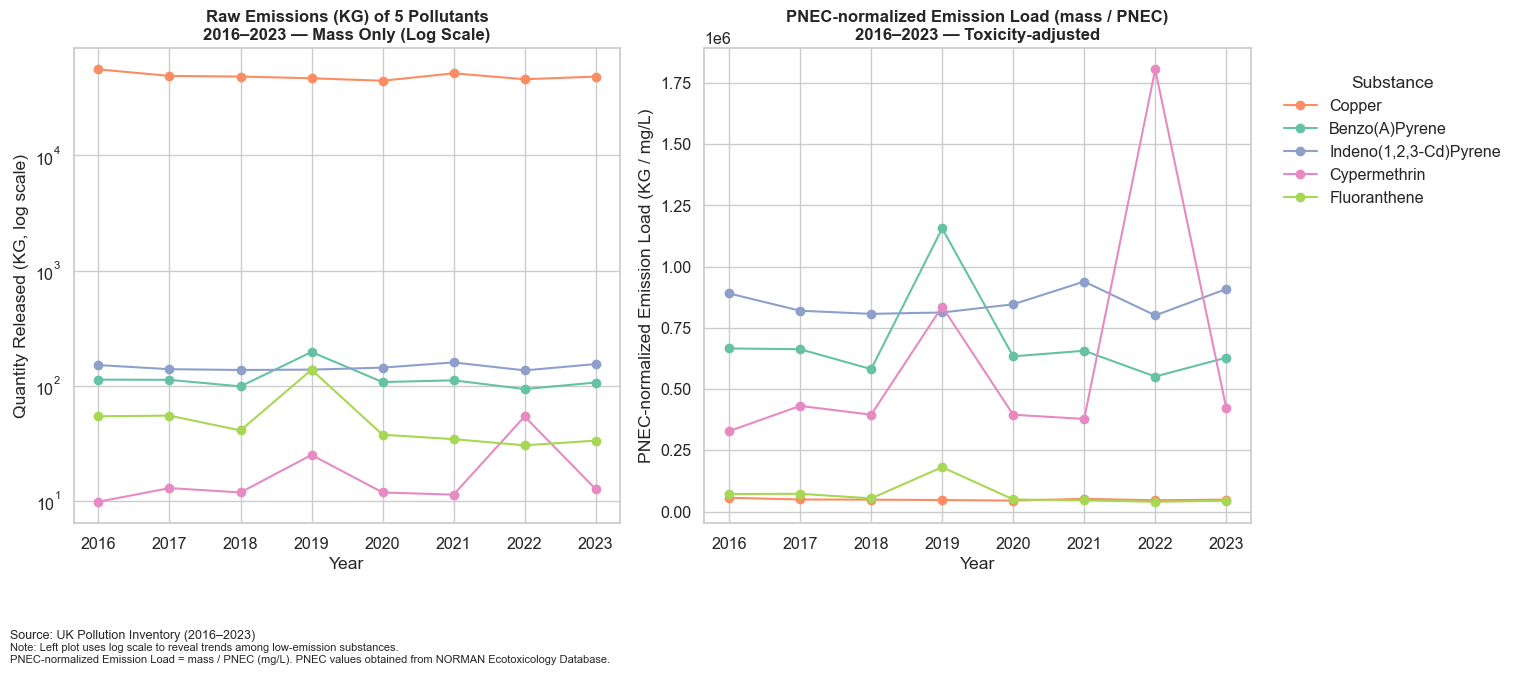

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.05)

# Read data
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate Toxic Pressure
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Emission Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Unified color scheme
substance_colors = {
    "Copper": "#FC8D62",
    "Benzo(A)Pyrene": "#66C2A5",
    "Indeno(1,2,3-Cd)Pyrene": "#8DA0CB",
    "Cypermethrin": "#E78AC3",
    "Fluoranthene": "#A6D854"
}

# Aggregate data
df_mass = df.groupby(['Year', 'SUBSTANCE NAME'])['QUANTITY RELEASED (KG)'].sum().reset_index()
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC-normalized Emission Load'].sum().reset_index()

# Create an image
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Figure 1: Raw emissions (logarithmic scale)
for substance in substance_colors:
    data = df_mass[df_mass['SUBSTANCE NAME'] == substance]
    axes[0].plot(data['Year'], data['QUANTITY RELEASED (KG)'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[0].set_yscale('log')
axes[0].set_title("Raw Emissions (KG) of 5 Pollutants\n2016–2023 — Mass Only (Log Scale)", fontsize=12, weight='bold')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Quantity Released (KG, log scale)")

# Figure 2: Toxic Pressure
for substance in substance_colors:
    data = df_tp[df_tp['SUBSTANCE NAME'] == substance]
    axes[1].plot(data['Year'], data['PNEC-normalized Emission Load'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[1].set_title("PNEC-normalized Emission Load (mass / PNEC)\n2016–2023 — Toxicity-adjusted", fontsize=12, weight='bold')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PNEC-normalized Emission Load (KG / µg/L)")

# ✅ Extract legend correctly, use only the legend on the right and place it outside the image
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Substance",
           loc='center left', bbox_to_anchor=(0.85, 0.75), frameon=False)

# Comments
fig.text(0.01, -0.08, "Source: UK Pollution Inventory (2016–2023)", fontsize=9, ha='left')
fig.text(0.01, -0.12,
         "Note: Left plot uses log scale to reveal trends among low-emission substances.\n"
         "PNEC-normalized Emission Load = mass / PNEC (µg/L). PNEC values obtained from NORMAN Ecotoxicology Database.",
         fontsize=8, ha='left')

# Save the image
plt.tight_layout(rect=[0, 0, 0.85, 1])  # 留出右侧 legend 空间
plt.savefig(r"C:\Users\qp24297\Downloads\Slide4_5_Comparison_LegendFixed.png", dpi=300)
plt.show()


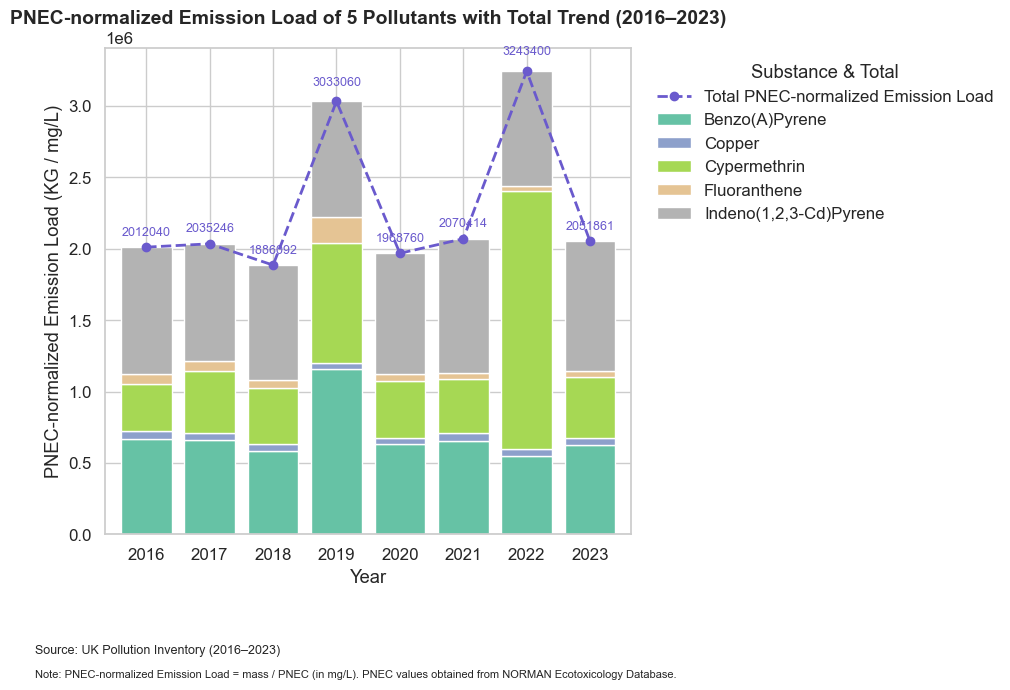

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid", font_scale=1.1)

# Read data
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate Toxic Pressure
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['Toxic Pressure'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Build a pivot table
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['Toxic Pressure'].sum().reset_index()
df_tp_pivot = df_tp.pivot(index='Year', columns='SUBSTANCE NAME', values='Toxic Pressure').fillna(0)
df_total = df_tp_pivot.sum(axis=1).reset_index(name='Total TP')

# ✅ Start drawing
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart
df_tp_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', width=0.8)

# Add a general trend line chart (dashed line + soft colors)
ax.plot(df_total['Year'] - df_total['Year'].min(), df_total['Total TP'],
        color='slateblue', linestyle='--', marker='o', linewidth=2, label='Total PNEC-normalized Emission Load')

# Add numerical annotation (consistent units)
for i, row in df_total.iterrows():
    value_label = f"{row['Total TP']:.0f}" if row['Total TP'] > 1000 else f"{row['Total TP']:.1f}"
    ax.text(i, row['Total TP'] * 1.03, value_label, color='slateblue', ha='center', va='bottom', fontsize=9)

# Title and axes
ax.set_title("PNEC-normalized Emission Load of 5 Pollutants with Total Trend (2016–2023)", fontsize=14, weight='bold')
ax.set_ylabel("PNEC-normalized Emission Load (KG / µg/L)")
ax.set_xlabel("Year")
ax.set_xticks(range(len(df_tp_pivot.index)))
ax.set_xticklabels(df_tp_pivot.index, rotation=0)

# Legend
ax.legend(title="Substance & Total", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Data source and annotation (emphasis on PNEC source)
plt.figtext(0.01, -0.08, "Source: UK Pollution Inventory (2016–2023)", fontsize=9, ha='left')
plt.figtext(0.01, -0.12,
            "Note: PNEC-normalized Emission Load = mass / PNEC (in µg/L). PNEC values obtained from NORMAN Ecotoxicology Database.",
            fontsize=8, ha='left')

# Save high-definition image
plt.tight_layout()
plt.savefig(r"C:\Users\qp24297\Downloads\Slide5_ToxicPressure_Final.png", dpi=300)
plt.show()


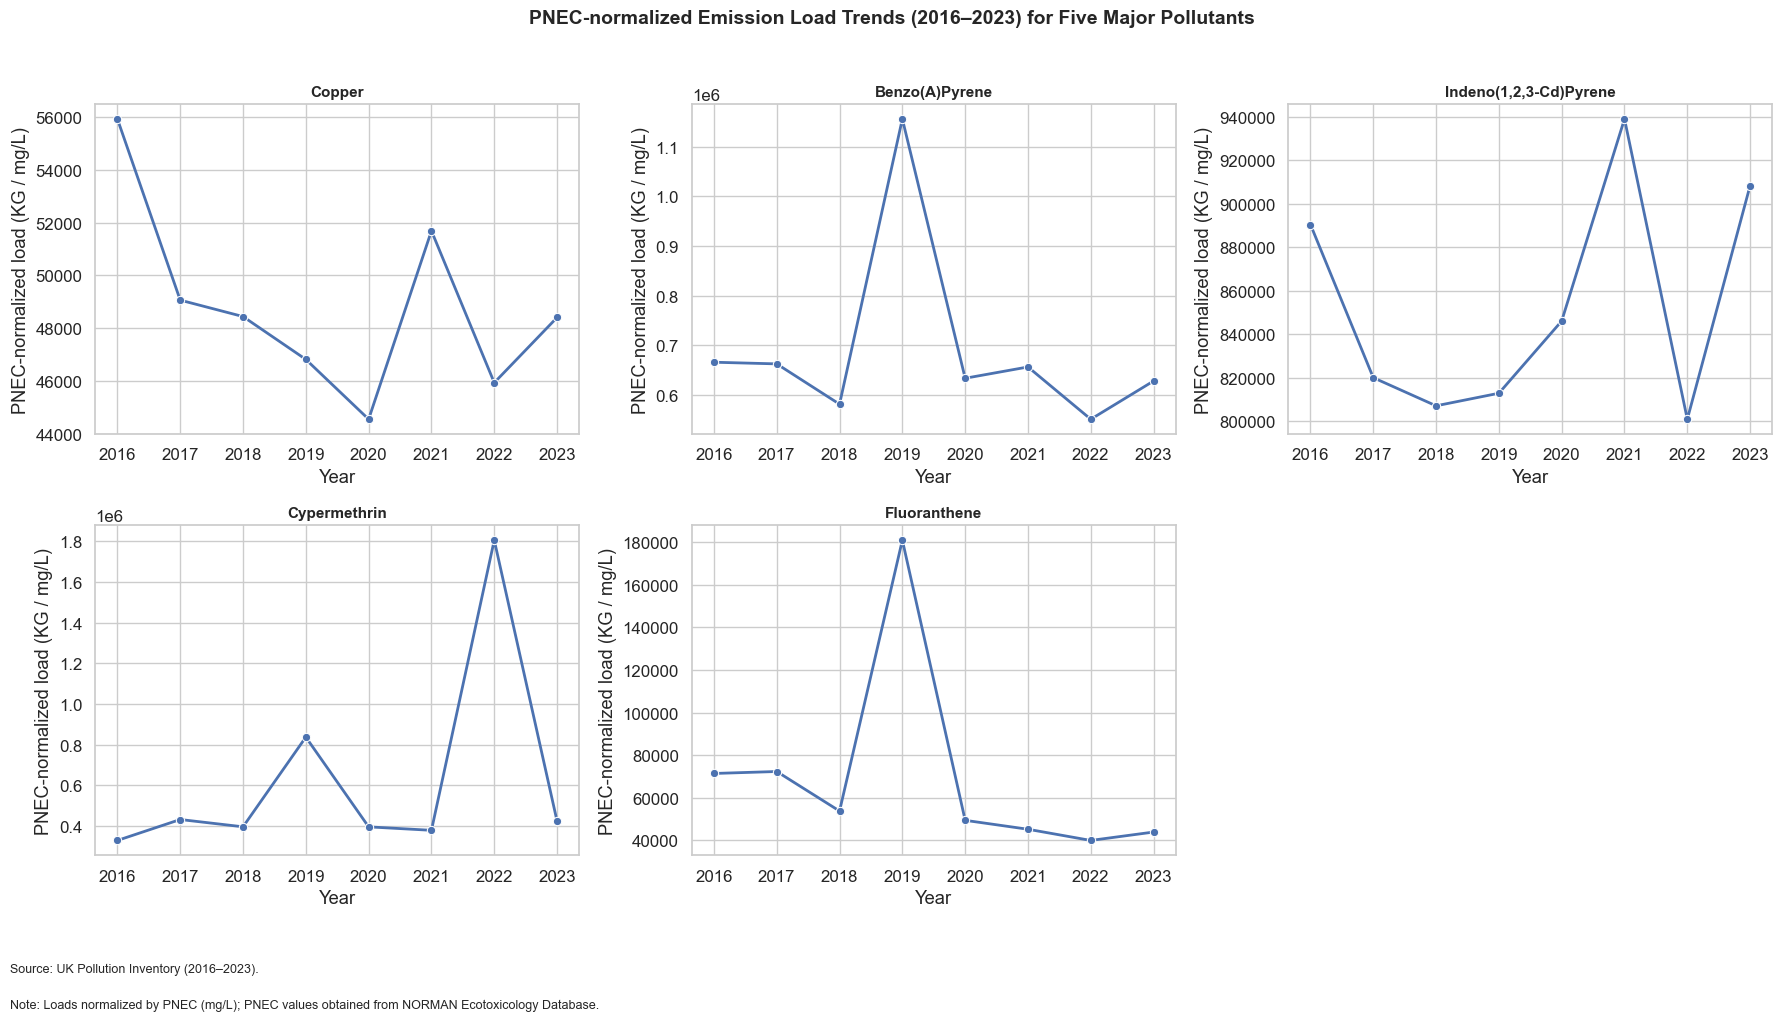

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# Read dataset
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate normalized load
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Substances to plot
substances = ["Copper", "Benzo(A)Pyrene", "Indeno(1,2,3-Cd)Pyrene", "Cypermethrin", "Fluoranthene"]

# Prepare subplots: 2 rows, 3 columns (remove last empty)
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()

for i, substance in enumerate(substances):
    df_single = df[df['SUBSTANCE NAME'] == substance]
    df_single_yearly = df_single.groupby("Year")["PNEC-normalized Load"].sum().reset_index()
    
    ax = axes[i]
    sns.lineplot(x="Year", y="PNEC-normalized Load", data=df_single_yearly,
                 marker="o", linewidth=2.0, ax=ax)
    ax.set_title(f"{substance}", fontsize=11, weight='bold')
    ax.set_xlabel("Year")
    ax.set_ylabel("PNEC-normalized load (KG / µg/L)")
    ax.grid(True, axis='y')

# Remove last empty subplot (axes[5])
fig.delaxes(axes[5])

# Add overall title and note lines
fig.suptitle("PNEC-normalized Emission Load Trends (2016–2023) for Five Major Pollutants", fontsize=14, weight='bold', y=1.02)
fig.text(0.01, -0.05,
    "Source: UK Pollution Inventory (2016–2023).",
    fontsize=9, ha='left')
fig.text(0.01, -0.09,
    "Note: Loads normalized by PNEC (mg/L); PNEC values obtained from NORMAN Ecotoxicology Database.",
    fontsize=9, ha='left')

plt.tight_layout()
plt.savefig(r"C:\Users\qp24297\Downloads\PNEC_Normalized_Load_Grid.png", dpi=300, bbox_inches='tight')
plt.show()


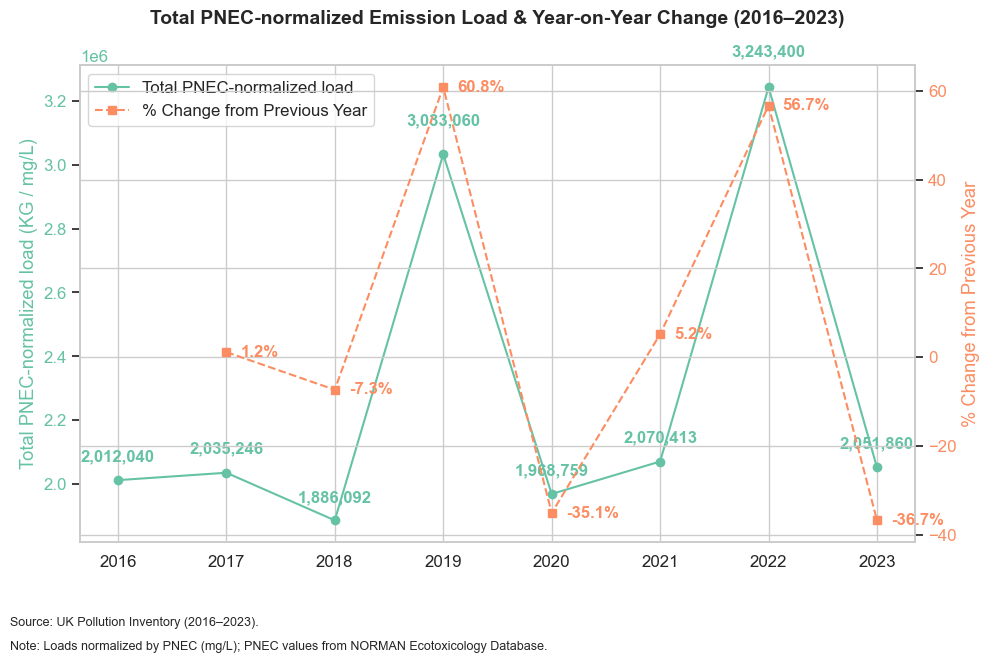

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate normalized load
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Compute total by year
df_total_tp = df.groupby("Year")["PNEC-normalized Load"].sum().reset_index()
df_total_tp["% Change"] = df_total_tp["PNEC-normalized Load"].pct_change() * 100

# Plot double y-axis chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Left Y axis: total normalized load
color1 = "#66C2A5"
ax1.plot(df_total_tp["Year"], df_total_tp["PNEC-normalized Load"], 
         marker='o', color=color1, label="Total PNEC-normalized load")
ax1.set_ylabel("Total PNEC-normalized load (KG / µg/L)", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(axis='y')

# Annotate values on the first line (slightly above)
for x, y in zip(df_total_tp["Year"], df_total_tp["PNEC-normalized Load"]):
    ax1.text(x, y * 1.03, f"{int(y):,}", color=color1, fontsize=12, weight='bold', ha='center')

# Right Y axis: year-on-year % change
ax2 = ax1.twinx()
color2 = "#FC8D62"
ax2.plot(df_total_tp["Year"], df_total_tp["% Change"], 
         marker='s', linestyle='--', color=color2, label="% Change from Previous Year")
ax2.set_ylabel("% Change from Previous Year", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Annotate values on the second line (slightly to the right)
for x, y in zip(df_total_tp["Year"], df_total_tp["% Change"]):
    ax2.text(x + 0.13, y, f"{y:.1f}%", color=color2, fontsize=12, weight='bold', ha='left', va='center')

# Title & combined legend
plt.title("Total PNEC-normalized Emission Load & Year-on-Year Change (2016–2023)", 
          fontsize=14, weight='bold', pad=30)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Source and Note on separate lines
plt.figtext(0.01, -0.06,
    "Source: UK Pollution Inventory (2016–2023).",
    fontsize=9, ha='left')
plt.figtext(0.01, -0.10,
    "Note: Loads normalized by PNEC (µg/L); PNEC values from NORMAN Ecotoxicology Database.",
    fontsize=9, ha='left')

plt.tight_layout()
plt.savefig(r"C:\Users\qp24297\Downloads\Total_PNEC_Normalized_Load_with_Bold_Labels.png", dpi=300)
plt.show()


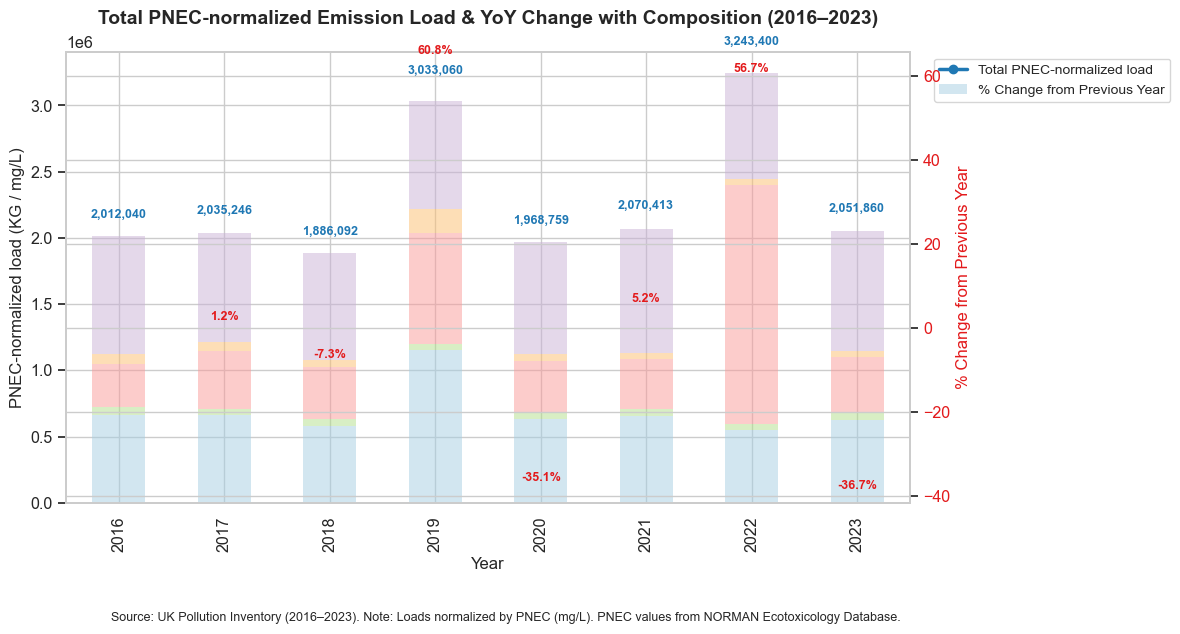

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

# PNEC values
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 3e-05,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Calculate PNEC-normalized load
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()
df['PNEC_normalized'] = df.apply(lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values[row['SUBSTANCE NAME']]
                                 if row['SUBSTANCE NAME'] in pnec_values else np.nan, axis=1)

# Group by Year and substance
df_grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC_normalized'].sum().reset_index()

# Pivot table
pivot_df = df_grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC_normalized').fillna(0)

# Compute total & YoY change
total_pressure = pivot_df.sum(axis=1)
pct_change = total_pressure.pct_change() * 100

# 📊 Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Semi-transparent stacked bars to show composition
colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6']
pivot_df.plot(kind='bar', stacked=True, ax=ax1, alpha=0.5, color=colors, edgecolor='none')

# Overlay total line
ax1.plot(total_pressure.index, total_pressure.values, color='#1f78b4', linewidth=2.5, marker='o', label='Total PNEC-normalized load')

# Left axis
ax1.set_ylabel("PNEC-normalized load (KG / mg/L)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)

# Right y axis for % change
ax2 = ax1.twinx()
ax2.plot(pct_change.index, pct_change.values, color='#e31a1c', linewidth=2, linestyle='--', marker='s', label='% Change from Previous Year')
ax2.set_ylabel("% Change from Previous Year", fontsize=12, color='#e31a1c')
ax2.tick_params(axis='y', labelcolor='#e31a1c')

# Label numbers on lines, offset to avoid overlap
for x, y in zip(total_pressure.index, total_pressure.values):
    ax1.text(x-2016, y*1.06, f"{int(y):,}", ha='center', va='bottom', fontsize=9, weight='bold', color='#1f78b4')
for x, y in zip(pct_change.index[1:], pct_change.values[1:]):
    ax2.text(x-2016, y*1.06, f"{y:.1f}%", ha='center', va='bottom', fontsize=9, weight='bold', color='#e31a1c')

# Combined legend outside
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize=10)

# Title and notes
plt.title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)",
          fontsize=14, weight='bold', pad=20)
plt.figtext(0.1, -0.05,
            "Source: UK Pollution Inventory (2016–2023). Note: Loads normalized by PNEC (mg/L). "
            "PNEC values from NORMAN Ecotoxicology Database.",
            ha='left', fontsize=9)

plt.tight_layout()
plt.show()



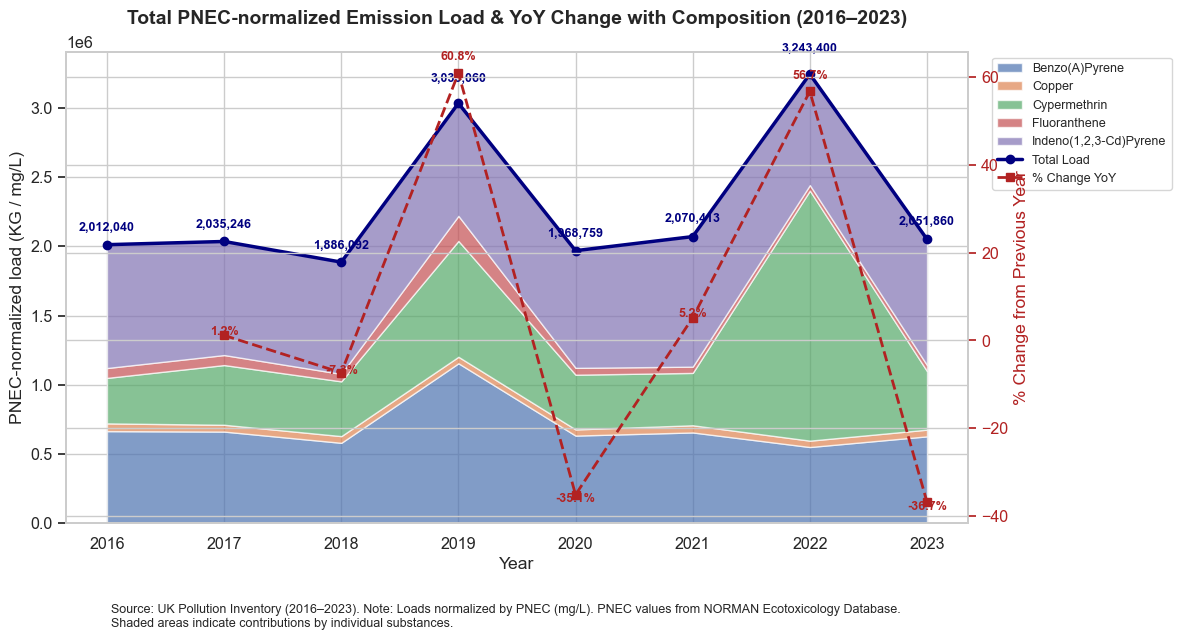

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 基础数据
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# PNEC 数据
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 3e-05,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# 计算标准化负荷
df['PNEC_normalized'] = df.apply(
    lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values.get(row['SUBSTANCE NAME'], np.nan),
    axis=1
)

# 按年合计
grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC_normalized'].sum().reset_index()
pivot_df = grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC_normalized').fillna(0)
years = pivot_df.index
total = pivot_df.sum(axis=1)
pct_change = total.pct_change() * 100

# 🎨 画图
fig, ax1 = plt.subplots(figsize=(12,6))

# 堆叠 area chart
ax1.stackplot(years, [pivot_df[col] for col in pivot_df.columns],
              labels=pivot_df.columns, alpha=0.7)
ax1.set_ylabel("PNEC-normalized load (KG / mg/L)")
ax1.set_xlabel("Year")
ax1.set_title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)", weight='bold', fontsize=14, pad=20)

# 总量折线
ax1.plot(years, total, color='navy', marker='o', linewidth=2.5, label='Total Load')

# 第二坐标轴
ax2 = ax1.twinx()
ax2.plot(years, pct_change, color='firebrick', linestyle='--', marker='s', linewidth=2, label='% Change YoY')
ax2.set_ylabel("% Change from Previous Year", color='firebrick')
ax2.tick_params(axis='y', colors='firebrick')

# 标注数字
for x, y in zip(years, total):
    ax1.text(x, y*1.05, f"{int(y):,}", color='navy', fontsize=9, weight='bold', ha='center')
for x, y in zip(years[1:], pct_change[1:]):
    ax2.text(x, y*1.05, f"{y:.1f}%", color='firebrick', fontsize=9, weight='bold', ha='center')

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize=9)

# 注释
plt.figtext(0.1, -0.06,
            "Source: UK Pollution Inventory (2016–2023). Note: Loads normalized by PNEC (mg/L). "
            "PNEC values from NORMAN Ecotoxicology Database.\nShaded areas indicate contributions by individual substances.",
            ha='left', fontsize=9)

plt.tight_layout()
plt.show()


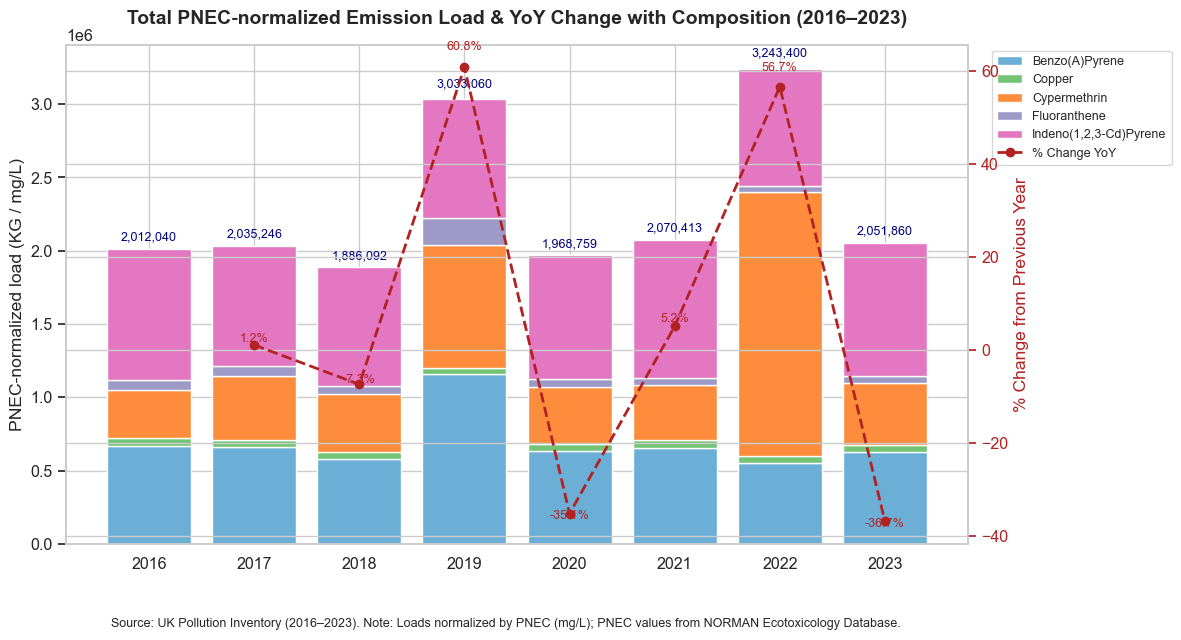

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 3e-05,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

df['PNEC_normalized'] = df.apply(
    lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values.get(row['SUBSTANCE NAME'], np.nan),
    axis=1
)

grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC_normalized'].sum().reset_index()
pivot_df = grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC_normalized').fillna(0)
years = pivot_df.index
totals = pivot_df.sum(axis=1)
pct_change = totals.pct_change() * 100

# 画图
fig, ax1 = plt.subplots(figsize=(12,6))

# 堆叠柱状图
bottoms = np.zeros(len(years))
colors = ['#6baed6','#74c476','#fd8d3c','#9e9ac8','#e377c2']  # 自定义颜色
for i, col in enumerate(pivot_df.columns):
    ax1.bar(years, pivot_df[col], bottom=bottoms, label=col, color=colors[i])
    bottoms += pivot_df[col]

ax1.set_ylabel("PNEC-normalized load (KG / mg/L)")
ax1.set_title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)", fontsize=14, weight='bold', pad=15)

# 折线 % Change
ax2 = ax1.twinx()
ax2.plot(years, pct_change, color='firebrick', marker='o', linestyle='--', linewidth=2, label='% Change YoY')
ax2.set_ylabel("% Change from Previous Year", color='firebrick')
ax2.tick_params(axis='y', colors='firebrick')

# 标注数字
for x, y in zip(years, totals):
    ax1.text(x, y*1.02, f"{int(y):,}", ha='center', va='bottom', fontsize=9, color='navy')
for x, y in zip(years[1:], pct_change[1:]):
    ax2.text(x, y*1.05, f"{y:.1f}%", ha='center', va='bottom', fontsize=9, color='firebrick')

# 图例合并
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.02,1), fontsize=9)

# 来源和说明
plt.figtext(0.1, -0.06,
            "Source: UK Pollution Inventory (2016–2023). "
            "Note: Loads normalized by PNEC (mg/L); PNEC values from NORMAN Ecotoxicology Database.",
            ha='left', fontsize=9)

plt.tight_layout()
plt.show()


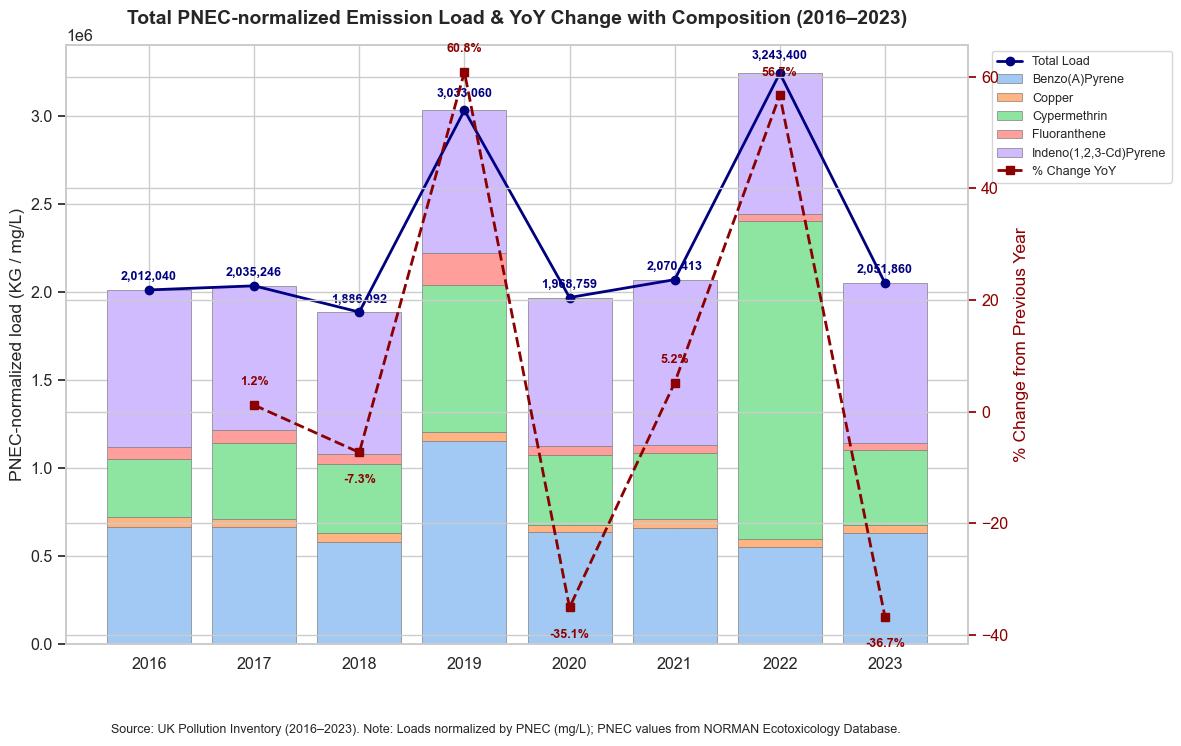

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC values
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 3e-05,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Calculate PNEC-normalized load
df['PNEC_normalized'] = df.apply(
    lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values.get(row['SUBSTANCE NAME'], np.nan),
    axis=1
)

# Prepare pivot table
grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC_normalized'].sum().reset_index()
pivot_df = grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC_normalized').fillna(0)
years = pivot_df.index
totals = pivot_df.sum(axis=1)
pct_change = totals.pct_change() * 100

# Plot
plt.figure(figsize=(12, 7))
ax1 = plt.gca()

# Stack bar with more gentle colors
colors = sns.color_palette("pastel", n_colors=5)
bottoms = np.zeros(len(years))
for i, col in enumerate(pivot_df.columns):
    ax1.bar(years, pivot_df[col], bottom=bottoms, label=col, color=colors[i], edgecolor='grey', linewidth=0.5)
    bottoms += pivot_df[col]

# Total line (same y-axis)
ax1.plot(years, totals, color='navy', marker='o', linewidth=2, label='Total Load')

ax1.set_ylabel("PNEC-normalized load (KG / mg/L)")
ax1.set_title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)", fontsize=14, weight='bold', pad=15)

# YoY % change line on second y-axis
ax2 = ax1.twinx()
ax2.plot(years, pct_change, color='darkred', linestyle='--', marker='s', linewidth=2, label='% Change YoY')
ax2.set_ylabel("% Change from Previous Year", color='darkred')
ax2.tick_params(axis='y', colors='darkred')

# Annotate totals
for x, y in zip(years, totals):
    ax1.text(x, y*1.02, f"{int(y):,}", ha='center', va='bottom', fontsize=9, fontweight='bold', color='navy')

# Annotate % change
for x, y in zip(years[1:], pct_change[1:]):
    offset = 3 if y >= 0 else -6
    ax2.text(x, y + offset, f"{y:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold', color='darkred')

# Combined legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.02,1), fontsize=9)

# Source & Note
plt.figtext(0.1, -0.06,
    "Source: UK Pollution Inventory (2016–2023). "
    "Note: Loads normalized by PNEC (mg/L); PNEC values from NORMAN Ecotoxicology Database.",
    ha='left', fontsize=9)

plt.tight_layout()
plt.show()


In [34]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

# Normalize substance names to lowercase
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.lower()

# PNEC values
pnec_values = {
    "indeno(1,2,3-cd)pyrene": 0.00017,
    "benzo(a)pyrene": 0.00017,
    "cypermethrin": 0.00003,
    "fluoranthene": 0.000762,
    "copper": 1.0
}

# Calculate PNEC-normalized load
df['PNEC-normalized'] = df.apply(lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values.get(row['SUBSTANCE NAME'], 1), axis=1)

# Group by year and substance
grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC-normalized'].sum().reset_index()
pivot = grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC-normalized').fillna(0)
years = pivot.index
totals = pivot.sum(axis=1)
pct_change = totals.pct_change() * 100

# Set colors for each pollutant
colors = {
    "benzo(a)pyrene": "#80b1d3",
    "copper": "#fdb462",
    "cypermethrin": "#b3de69",
    "fluoranthene": "#fccde5",
    "indeno(1,2,3-cd)pyrene": "#d9d9d9"
}

# ------------------------
# Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

bars = pivot.plot(
    kind='bar',
    stacked=True,
    color=[colors.get(col, '#cccccc') for col in pivot.columns],
    ax=ax1,
    width=0.7,
    edgecolor='grey'
)

# Left y-axis: total load line
ax1.plot(years, totals, color='#08306b', marker='o', linewidth=2, label='Total Load')
ax1.set_ylabel("PNEC-normalized load (KG / mg/L)")
ax1.set_xlabel("Year")
ax1.set_title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)",
              fontsize=15, weight='bold', pad=20)

# Annotate totals
for x, y in zip(years, totals):
    ax1.text(x, y*1.03, f"{int(y):,}", ha='center', va='bottom',
             fontsize=10, weight='bold', color='#333333')

# Right y-axis: YoY change
ax2 = ax1.twinx()
ax2.plot(years, pct_change, color='#99000d', linestyle='--', marker='s', linewidth=2, label='% Change YoY')
ax2.set_ylabel("% Change from Previous Year", color='#99000d')
ax2.tick_params(axis='y', labelcolor='#99000d')

for x, y in zip(years[1:], pct_change[1:]):
    ax2.text(x, y*1.1, f"{y:+.1f}%", ha='center', va='bottom',
             fontsize=10, weight='bold', color='#99000d')

# Add grid only on y axis
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.grid(axis='x', visible=False)

# Legend combined
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.02,1), frameon=False, fontsize=9)

# Source and notes below
plt.subplots_adjust(left=0.08, right=0.88, bottom=0.2, top=0.9)
plt.figtext(0.08, 0.05,
    "Source: UK Pollution Inventory (2016–2023). "
    "Note: Loads normalized by PNEC (mg/L); PNEC values from NORMAN Ecotoxicology Database.",
    ha='left', fontsize=9, color='#333333')

plt.show()


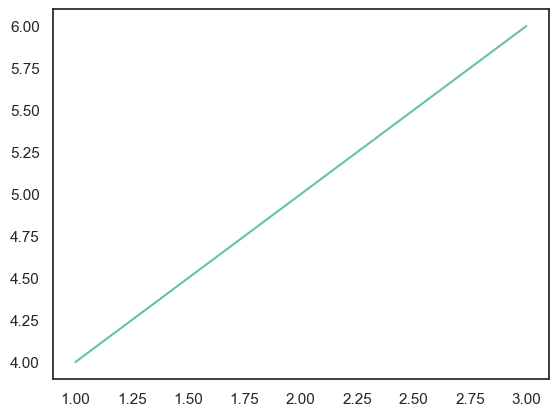

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3], [4,5,6])
plt.show()


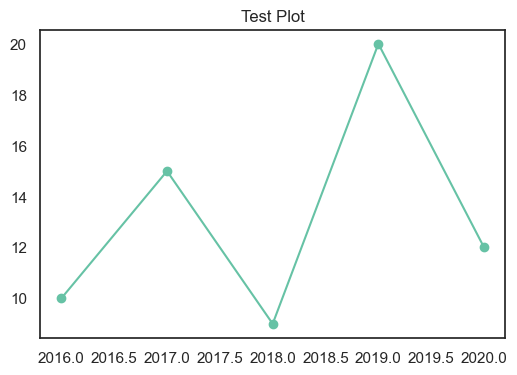

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot([2016, 2017, 2018, 2019, 2020], [10, 15, 9, 20, 12], marker='o')
plt.title("Test Plot")
plt.show()


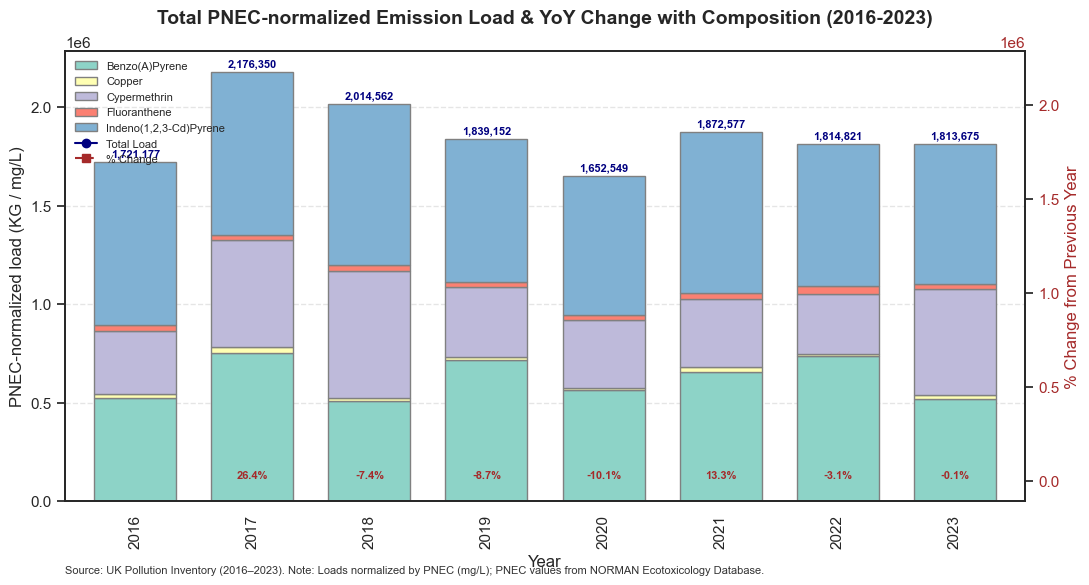

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data
years = np.arange(2016, 2024)
benzo = np.random.randint(500000, 800000, len(years))
copper = np.random.randint(10000, 30000, len(years))
cyper = np.random.randint(300000, 700000, len(years))
fluor = np.random.randint(20000, 40000, len(years))
indeno = np.random.randint(700000, 900000, len(years))
total = benzo + copper + cyper + fluor + indeno
pct_change = np.append([np.nan], np.diff(total)/total[:-1]*100)

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Benzo(A)Pyrene': benzo,
    'Copper': copper,
    'Cypermethrin': cyper,
    'Fluoranthene': fluor,
    'Indeno(1,2,3-Cd)Pyrene': indeno
})
df.set_index('Year', inplace=True)

# Create stacked bar
fig, ax1 = plt.subplots(figsize=(12,6))
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3']
bars = df.plot(kind='bar', stacked=True, color=colors, ax=ax1, width=0.7, edgecolor='grey')

ax1.set_ylabel("PNEC-normalized load (KG / mg/L)")
ax1.set_xlabel("Year")

# Plot total line
ax2 = ax1.twinx()
ax2.plot(df.index, total, color='navy', marker='o', label='Total Load')
ax2.set_ylabel("% Change from Previous Year", color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

# Plot % change
ax2.plot(df.index, pct_change, color='brown', linestyle='--', marker='s', label='% Change')

# Annotations
for x, y in zip(df.index, total):
    ax1.text(x-2016, y*1.01, f"{y:,}", ha='center', va='bottom', fontsize=8, weight='bold', color='navy')
for x, y in zip(df.index[1:], pct_change[1:]):
    ax2.text(x-2016, y*1.05, f"{y:.1f}%", ha='center', va='bottom', fontsize=8, weight='bold', color='brown')

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=8, frameon=False)

# Grid and final
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016-2023)", fontsize=14, weight='bold', pad=20)
plt.subplots_adjust(left=0.08, right=0.88, bottom=0.15, top=0.9)
plt.figtext(0.08, 0.03, "Source: UK Pollution Inventory (2016–2023). Note: Loads normalized by PNEC (mg/L); PNEC values from NORMAN Ecotoxicology Database.", 
            ha='left', fontsize=8, color='#333333')
plt.show()


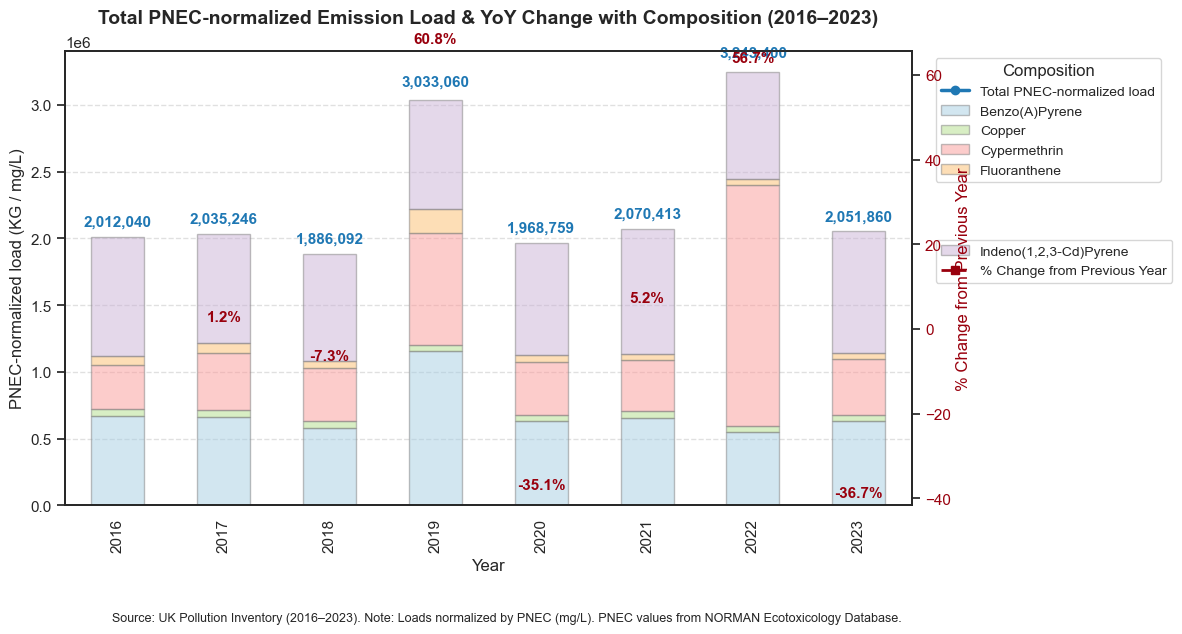

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

# PNEC values
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 3e-05,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Calculate PNEC-normalized load
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()
df['PNEC_normalized'] = df.apply(lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values[row['SUBSTANCE NAME']]
                                 if row['SUBSTANCE NAME'] in pnec_values else np.nan, axis=1)

# Group by Year and substance
df_grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC_normalized'].sum().reset_index()

# Pivot table
pivot_df = df_grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC_normalized').fillna(0)

# Compute total & YoY change
total_pressure = pivot_df.sum(axis=1)
pct_change = total_pressure.pct_change() * 100

# 📊 Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colors similar to your favorite stack
colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6']
pivot_df.plot(kind='bar', stacked=True, ax=ax1, alpha=0.5, color=colors, edgecolor='grey')

# Overlay total line
line1, = ax1.plot(total_pressure.index, total_pressure.values, color='#1f78b4', linewidth=2.5, marker='o', label='Total PNEC-normalized load')

# Left axis labels
ax1.set_ylabel("PNEC-normalized load (KG / mg/L)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)

# Right y axis for % change
ax2 = ax1.twinx()
line2, = ax2.plot(pct_change.index, pct_change.values, color='#99000d', linewidth=2, linestyle='--', marker='s', label='% Change from Previous Year')
ax2.set_ylabel("% Change from Previous Year", fontsize=12, color='#99000d')
ax2.tick_params(axis='y', labelcolor='#99000d')

# Label totals on line
for x, y in zip(total_pressure.index, total_pressure.values):
    ax1.text(x-2016, y*1.03, f"{int(y):,}", ha='center', va='bottom', fontsize=11, weight='bold', color='#1f78b4')
# Label % change on line
for x, y in zip(pct_change.index[1:], pct_change.values[1:]):
    ax2.text(x-2016, y*1.1 if y > 0 else y*1.1, f"{y:.1f}%", ha='center', va='bottom', fontsize=11, weight='bold', color='#99000d')

# Grid
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.grid(axis='x', visible=False)

# Legend split in two lines
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
first_legend = ax1.legend(handles1[:5], labels1[:5], loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize=10, title='Composition')
second_legend = ax1.legend(handles1[5:] + handles2, labels1[5:] + labels2, loc='upper left', bbox_to_anchor=(1.02, 0.6), fontsize=10)
ax1.add_artist(first_legend)

# Title and notes
plt.title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)",
          fontsize=14, weight='bold', pad=20)
plt.figtext(0.1, -0.05,
            "Source: UK Pollution Inventory (2016–2023). Note: Loads normalized by PNEC (mg/L). "
            "PNEC values from NORMAN Ecotoxicology Database.",
            ha='left', fontsize=9)

plt.tight_layout()
plt.show()


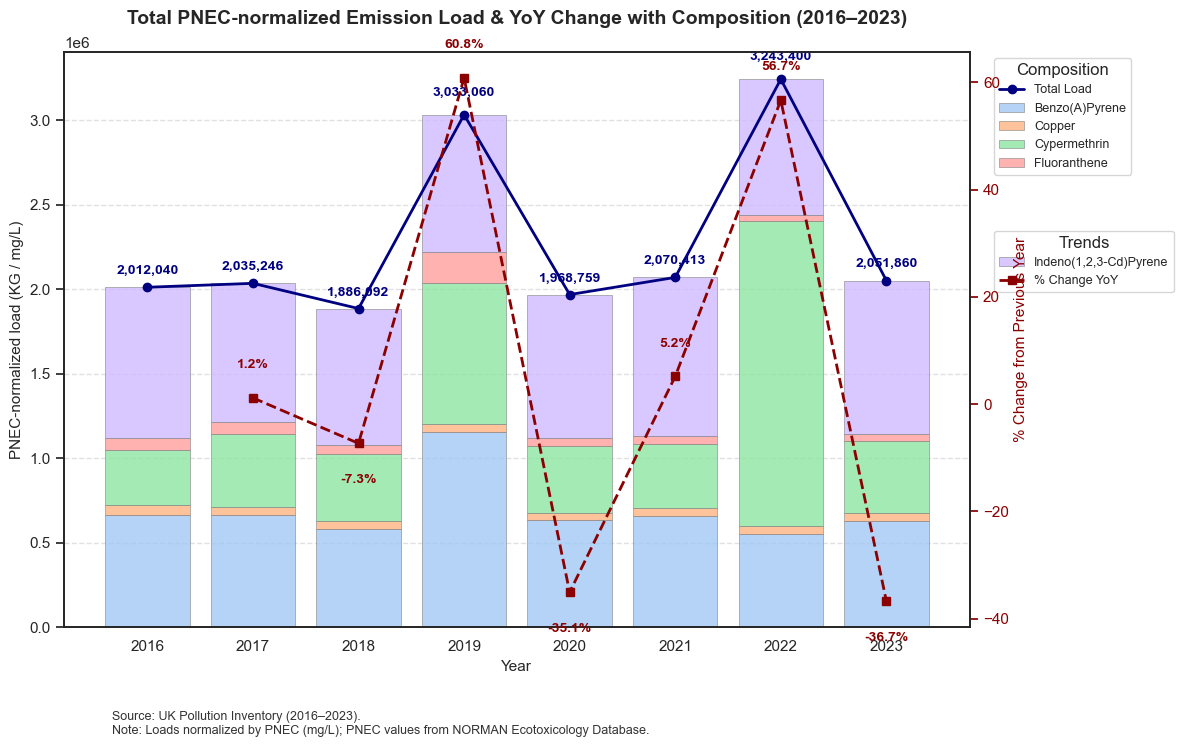

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"
df = pd.read_csv(file_path)
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# PNEC values
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 3e-05,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Calculate normalized
df['PNEC_normalized'] = df.apply(
    lambda row: row['QUANTITY RELEASED (KG)'] / pnec_values.get(row['SUBSTANCE NAME'], np.nan),
    axis=1
)

# Pivot table
grouped = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC_normalized'].sum().reset_index()
pivot_df = grouped.pivot(index='Year', columns='SUBSTANCE NAME', values='PNEC_normalized').fillna(0)
years = pivot_df.index
totals = pivot_df.sum(axis=1)
pct_change = totals.pct_change() * 100

# Plot
plt.figure(figsize=(12, 7))
ax1 = plt.gca()

# Stack bar
colors = sns.color_palette("pastel", n_colors=5)
bottoms = np.zeros(len(years))
for i, col in enumerate(pivot_df.columns):
    ax1.bar(years, pivot_df[col], bottom=bottoms, label=col, color=colors[i], edgecolor='grey', linewidth=0.5, alpha=0.8)
    bottoms += pivot_df[col]

# Total line
line1, = ax1.plot(years, totals, color='navy', marker='o', linewidth=2, label='Total Load')

# YoY % change
ax2 = ax1.twinx()
line2, = ax2.plot(years, pct_change, color='darkred', linestyle='--', marker='s', linewidth=2, label='% Change YoY')
ax2.set_ylabel("% Change from Previous Year", color='darkred', fontsize=11)
ax2.tick_params(axis='y', colors='darkred')

# Labels on total line
for x, y in zip(years, totals):
    ax1.text(x, y*1.03, f"{int(y):,}", ha='center', va='bottom', fontsize=10, weight='bold', color='navy')
# Labels on YoY line
for x, y in zip(years[1:], pct_change[1:]):
    offset = 5 if y >= 0 else -8
    ax2.text(x, y + offset, f"{y:.1f}%", ha='center', va='bottom', fontsize=10, weight='bold', color='darkred')

# Axis labels and title
ax1.set_ylabel("PNEC-normalized load (KG / mg/L)", fontsize=11)
ax1.set_xlabel("Year", fontsize=11)
ax1.set_title("Total PNEC-normalized Emission Load & YoY Change with Composition (2016–2023)",
              fontsize=14, weight='bold', pad=20)

# Clean grid
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.grid(axis='x', visible=False)

# Legends in two rows
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
first_legend = ax1.legend(handles1[:5], labels1[:5], loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize=9, title="Composition")
second_legend = ax1.legend(handles1[5:] + handles2, labels1[5:] + labels2, loc='upper left', bbox_to_anchor=(1.02, 0.7), fontsize=9, title="Trends")
ax1.add_artist(first_legend)

# Source and notes
plt.figtext(0.1, -0.06,
    "Source: UK Pollution Inventory (2016–2023).\n"
    "Note: Loads normalized by PNEC (mg/L); PNEC values from NORMAN Ecotoxicology Database.",
    ha='left', fontsize=9, color='#333333')

plt.tight_layout()
plt.show()
